In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [12]:
hs = torch.zeros((1,32,32,32), dtype= torch.float64)

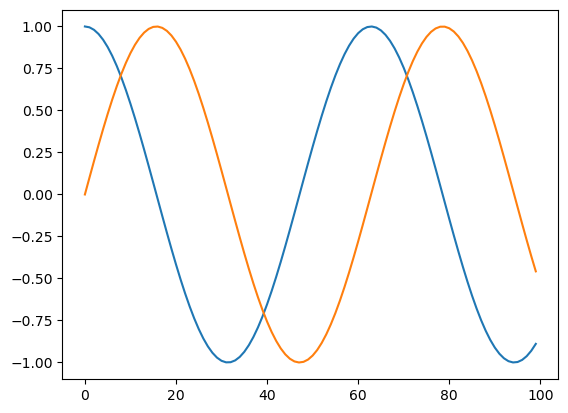

In [77]:
n = 10
scale = 1

X = np.arange(0, n, 0.1)
X_cos = np.cos(X * scale)
X_sin = np.sin(X * scale)

plt.plot(X_cos)
plt.plot(X_sin)

In [13]:
def pos_emb_2d(rows, cols, func, scale=1.0):

    """
    rows: number of rows
    cols: number of columns
    func: cos or sin
    """
    
    # create matrix
    row_arr = np.arange(rows)  
    col_arr = np.arange(cols)

    X, Y = np.meshgrid(row_arr, col_arr)

    if func == 'sin':
        # Calculate the sine values for the grid
        Z = np.sin(X * scale) * np.sin(Y * scale) 
    
    elif func == 'cos':
        # Calculate the cosine values for the grid
        Z = np.cos(X * scale) * np.cos(Y * scale) 
        
    return X, Y, Z


def pos_embd_tensor(pe_channels = 5, scale_par = 1):

    """
    channels: number of channels we want to create with positional embeddings. The default value is 5.
    scale_par: scale parameter for the positional embeddings. Higher values give lower frequency cos and sin functions. The default value is 1.
    """
    pos_emb_tensor = torch.zeros([180, 180, pe_channels])


    for i in range(pe_channels):
        if i%2 == 0:
            func = 'sin'
            scale_par += 1 
        
        elif i%2 == 1:
            func = 'cos'  


        _, _, Z = pos_emb_2d(180, 180, func, scale = np.exp(-scale_par))
        pos_emb_tensor[:, :, i] = torch.from_numpy(Z)

    return pos_emb_tensor

In [61]:
channels = 5

pos_emb_tensor = pos_embd_tensor(pe_channels = channels, scale_par = 1)/10000

clockwise_pos_emb_tensor = torch.rot90(pos_emb_tensor, k=1, dims=(0, 1))

#inverted_tensor = 1 - pos_emb_tensor

full_pos_emb_tensor = torch.cat((pos_emb_tensor, clockwise_pos_emb_tensor), dim = 2)    
#full_pos_emb_tensor = torch.cat((pos_emb_tensor, inverted_tensor), dim = 2)    



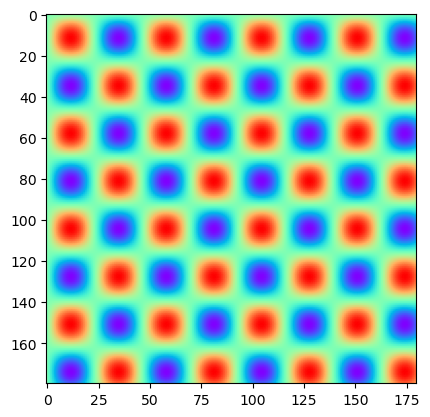

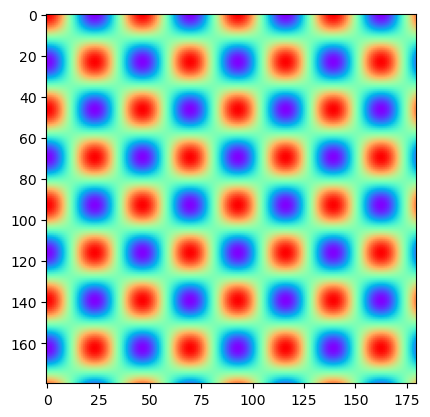

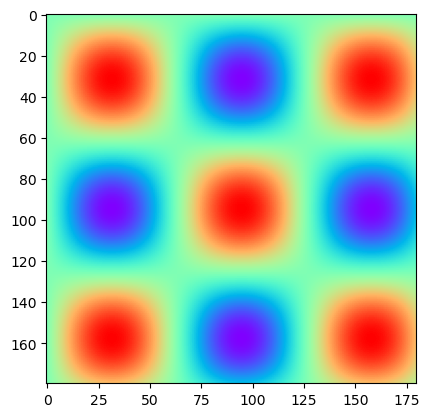

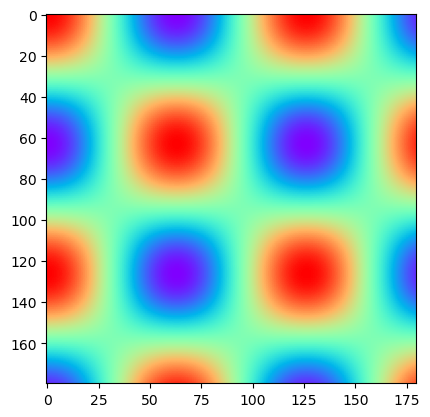

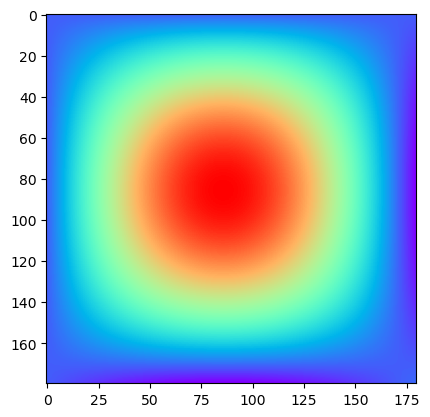

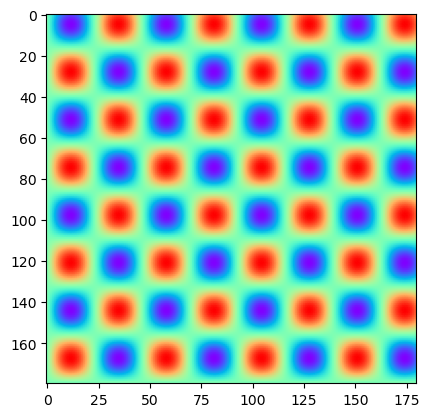

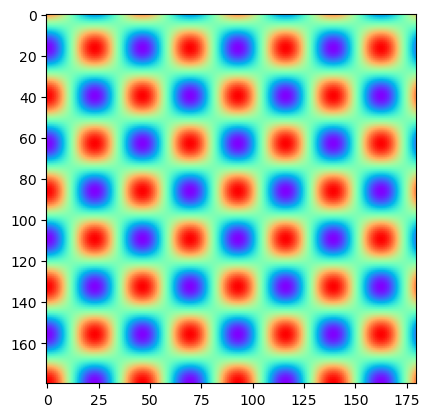

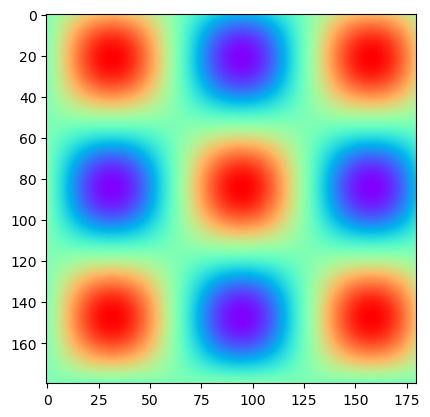

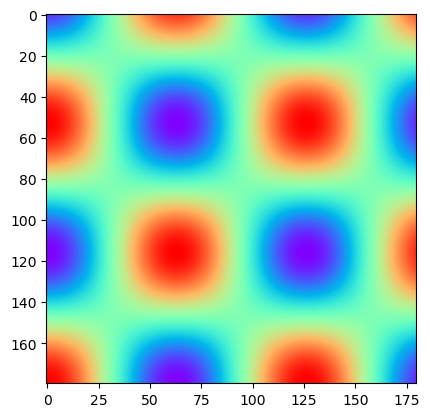

In [69]:
for i in range(channels*2-1):
    plt.imshow(full_pos_emb_tensor[:, :, i], cmap='rainbow')
    plt.show()

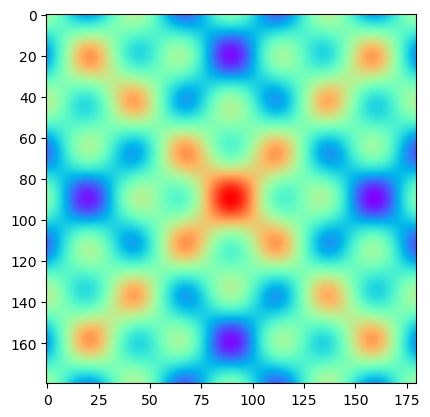

In [70]:
plt.imshow(full_pos_emb_tensor.sum(dim = 2), cmap='rainbow')

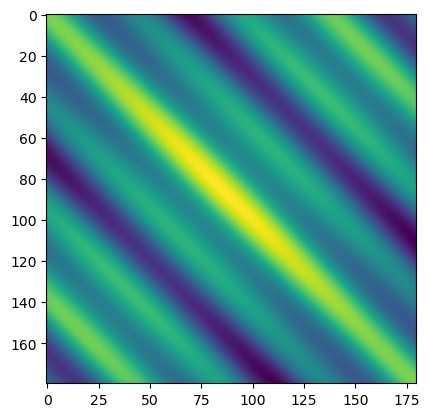

In [47]:
plt.imshow(pos_emb_tensor.sum(dim = 2))

In [48]:
# Flip the tensor clockwise
clockwise_tensor = torch.rot90(pos_emb_tensor.sum(dim = 2), k=1, dims=(0, 1))

sum_tensor = clockwise_tensor + pos_emb_tensor.sum(dim = 2)

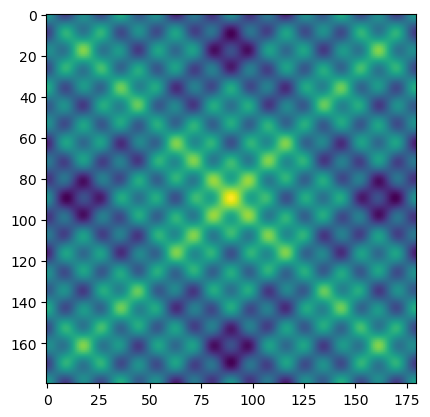

In [42]:
plt.imshow(sum_tensor)

In [17]:
# Flip the tensor clockwise
clockwise_tensor = torch.rot90(pos_emb_tensor.sum(dim = 2), k=1, dims=(0, 1))

# Flip the tensor counterclockwise
counterclockwise_tensor = torch.rot90(pos_emb_tensor.sum(dim = 2), k=3, dims=(0, 1))

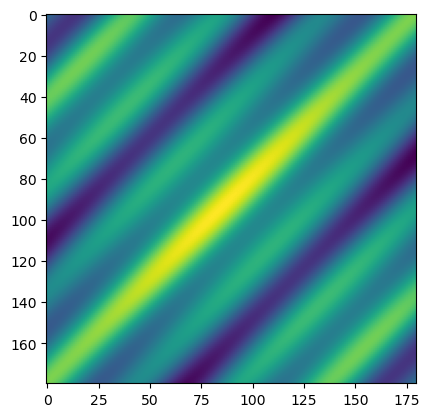

In [18]:
plt.imshow(clockwise_tensor)

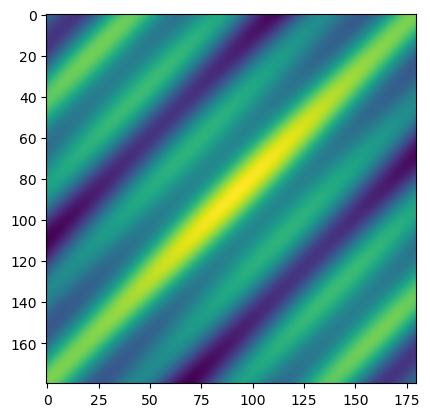

In [19]:
plt.imshow(counterclockwise_tensor)

In [6]:
pos_emb_tensor.max()

tensor(1.0000e-04)

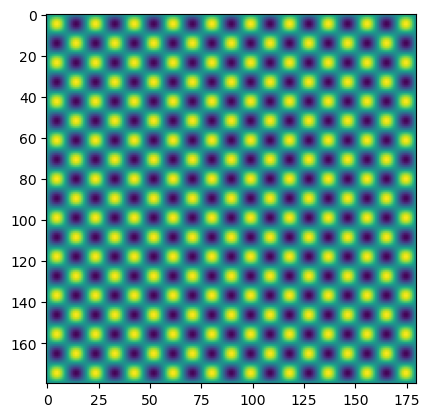

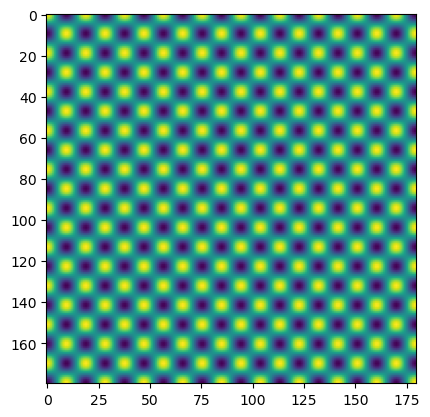

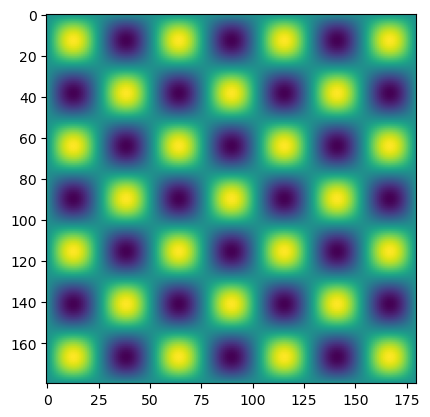

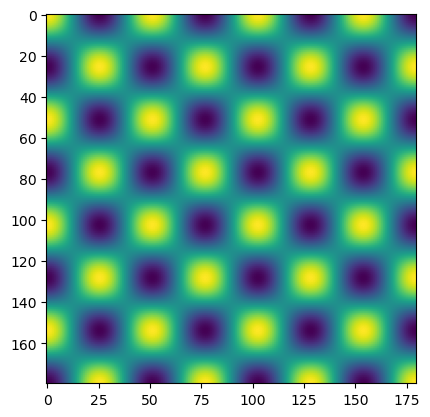

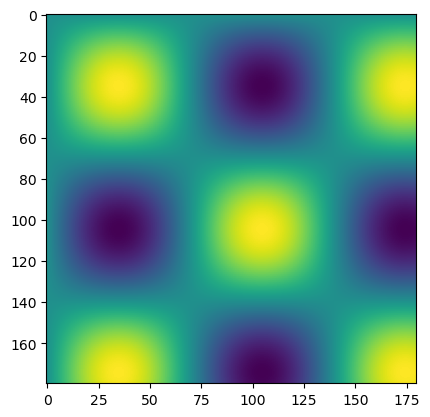

In [7]:
channels = 5
scale_par = 0.1
pos_emb_tensor = torch.zeros([180, 180, channels])

for i in range(channels):

    if i%2 == 0:
        func = 'sin'
        scale_par += 1 
    
    elif i%2 == 1:
        func = 'cos' 

    X, Y, Z = pos_emb_2d(180, 180, func, scale = np.exp(-scale_par))
    pos_emb_tensor[:, :, i] = torch.from_numpy(Z)

    plt.imshow(pos_emb_tensor[:, :, i])
    plt.show()

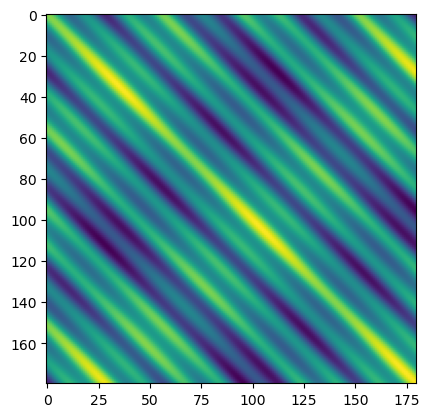

In [8]:

plt.imshow(pos_emb_tensor.sum(dim=2))
plt.show()

In [ ]:
def plot2d(X, Y, Z):

    # Create the 2D plot
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, cmap='viridis')  # Contour plot with colormap 'viridis'
    plt.colorbar()  # Add a colorbar to indicate the values

    # Add labels and a title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Cosine Plot')

    # Show the plot
    plt.show()

In [ ]:
rows = 180
cols = 180
func = 'sin'

for i in [2, 1, 0.5, 0.1, 0.05, 0.01]:
    for j in ['sin', 'cos']:
        X, Y, Z = posEmb2d(rows=rows, cols=cols, func=j, scale=i)
        plot2d(X, Y, Z)


In [ ]:
Z_full = np.zeros((rows, cols))

for i in [2, 1, 0.5, 0.1, 0.05, 0.01]:
    for j in ['sin', 'cos']:
        X, Y, Z = posEmb2d(rows=rows, cols=cols, func=j, scale=i)
        
        Z_full += Z
        
        
plot2d(X, Y, Z_full)

In [ ]:
torch.tensor(Z).shape

In [ ]:
def positional_encoding(max_seq_len, d_model):
    pos_enc = np.array([
        [pos / np.power(10000, 2 * (i // 2) / d_model) for i in range(d_model)]
        for pos in range(max_seq_len)
    ])
    pos_enc[:, 0::2] = np.sin(pos_enc[:, 0::2])  # Apply sine to even indices
    pos_enc[:, 1::2] = np.cos(pos_enc[:, 1::2])  # Apply cosine to odd indices
    return pos_enc

In [ ]:
test= positional_encoding(10, 3)

test

In [ ]:
test.shape

In [ ]:
torch.tensor(Z)